In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms,datasets
import os

device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)



train_dir = "C:/cv/pandas/data/PandasBears/Train"
print(os.listdir(train_dir))
test_dir = "C:/cv/pandas/data/PandasBears/Test"
print(os.listdir(test_dir))

cuda
['Bears', 'Pandas']
['Bears', 'Pandas']


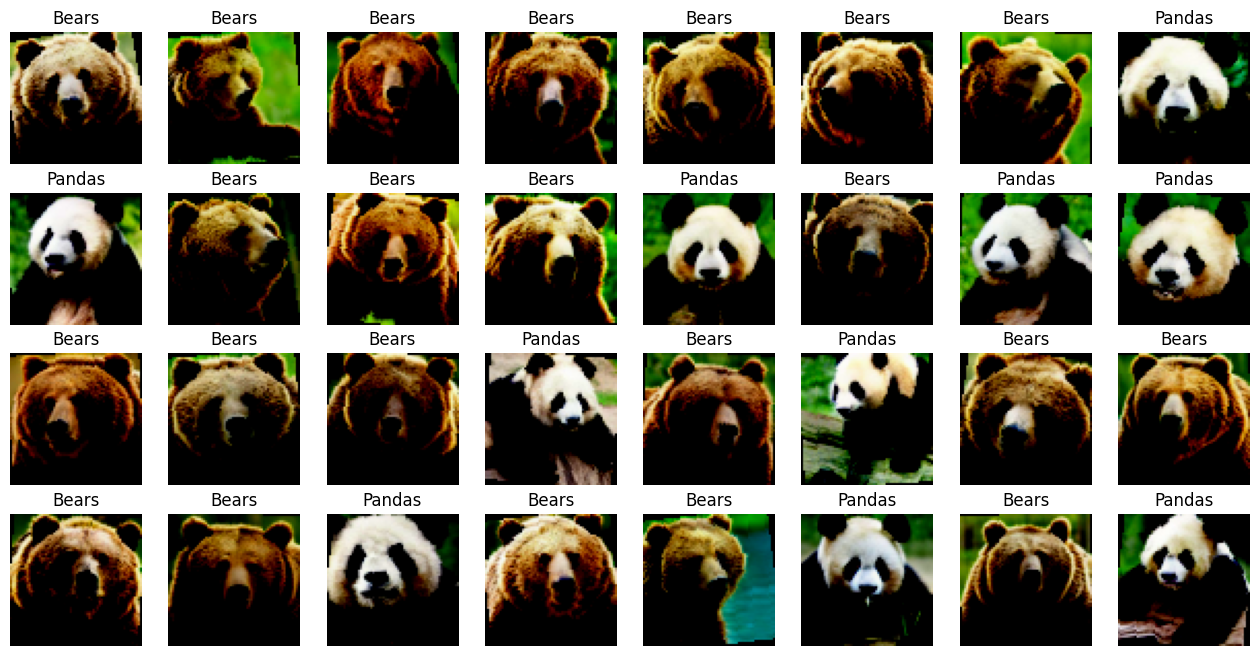

In [2]:
labels = ['Bears', 'Pandas']


transformed_data = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
    ])



train_dataset = datasets.ImageFolder(train_dir,transform=transformed_data)
test_dataset = datasets.ImageFolder(test_dir,transform=transformed_data)



learning_rate = 0.001
BATCH_SIZE = 64
epochs = 5
train_dataloader = torch.utils.data.DataLoader(train_dataset,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=  torch.utils.data.DataLoader(test_dataset,batch_size=BATCH_SIZE,shuffle=False)

images,labels = next(iter(train_dataloader))



fig,axs = plt.subplots(4,8,figsize=(16,8))

for i,ax in enumerate(axs.flat):
    image = images[i].numpy().transpose((1,2,0))
    image = np.clip(image,0,1)
    ax.imshow(image)
    ax.set_title(train_dataset.classes[labels[i]])
    ax.axis("off")
plt.show()

In [3]:

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.con1 = nn.Conv2d(3, 32,kernel_size=3,padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2,2)
        
        self.con2 = nn.Conv2d(32, 64, kernel_size=3,padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2,2)
        
        self.con3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2,2)
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(8*8*128, out_features=2),
            nn.ReLU(),
            nn.Dropout(0.1),
            )
        
        
    def forward(self,x):
        x = self.pool1(F.relu(self.bn1(self.con1(x))))
        x = self.pool2(F.relu(self.bn2(self.con2(x))))
        x = self.pool3(F.relu(self.bn3(self.con3(x))))
        x = self.classifier(x)
        return x


model = Net()        
model.to(device)


Net(
  (con1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (con2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (con3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8192, out_features=2, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
  )
)

In [4]:
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
criterion = nn.CrossEntropyLoss().to(device)
total_steps = len(train_dataloader)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=2,gamma=0.1)


for epoch in range(epochs):
    for i,(images,labels) in enumerate(train_dataloader):
        images,labels = images.to(device),labels.to(device)
        outputs = model(images)
        loss = criterion(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
               .format(epoch+1, epochs, i+1, total_steps, loss.item()))

    scheduler.step()

Epoch [1/5], Step [1/8], Loss: 0.6589
Epoch [1/5], Step [2/8], Loss: 0.3760
Epoch [1/5], Step [3/8], Loss: 0.4151
Epoch [1/5], Step [4/8], Loss: 0.4365
Epoch [1/5], Step [5/8], Loss: 0.4305
Epoch [1/5], Step [6/8], Loss: 0.4309
Epoch [1/5], Step [7/8], Loss: 0.4033
Epoch [1/5], Step [8/8], Loss: 0.3590
Epoch [2/5], Step [1/8], Loss: 0.3801
Epoch [2/5], Step [2/8], Loss: 0.3601
Epoch [2/5], Step [3/8], Loss: 0.4441
Epoch [2/5], Step [4/8], Loss: 0.3469
Epoch [2/5], Step [5/8], Loss: 0.4225
Epoch [2/5], Step [6/8], Loss: 0.3390
Epoch [2/5], Step [7/8], Loss: 0.4009
Epoch [2/5], Step [8/8], Loss: 0.3201
Epoch [3/5], Step [1/8], Loss: 0.3683
Epoch [3/5], Step [2/8], Loss: 0.4373
Epoch [3/5], Step [3/8], Loss: 0.3575
Epoch [3/5], Step [4/8], Loss: 0.3258
Epoch [3/5], Step [5/8], Loss: 0.3582
Epoch [3/5], Step [6/8], Loss: 0.3575
Epoch [3/5], Step [7/8], Loss: 0.4550
Epoch [3/5], Step [8/8], Loss: 0.4932
Epoch [4/5], Step [1/8], Loss: 0.4008
Epoch [4/5], Step [2/8], Loss: 0.3467
Epoch [4/5],

In [5]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images,labels in test_dataloader:
        images,labels = images.to(device),labels.to(device)
        outputs = model(images)
        _,preds = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
        print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 100.0 %
Test Accuracy of the model on the 10000 test images: 100.0 %
